# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Your code here
boston = pd.read_csv("boston_data.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [6]:
# Describing the data
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [7]:
# Checking for NaN values
na_df = boston.isna().sum()
na_df

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [8]:
# Looking at the different types
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

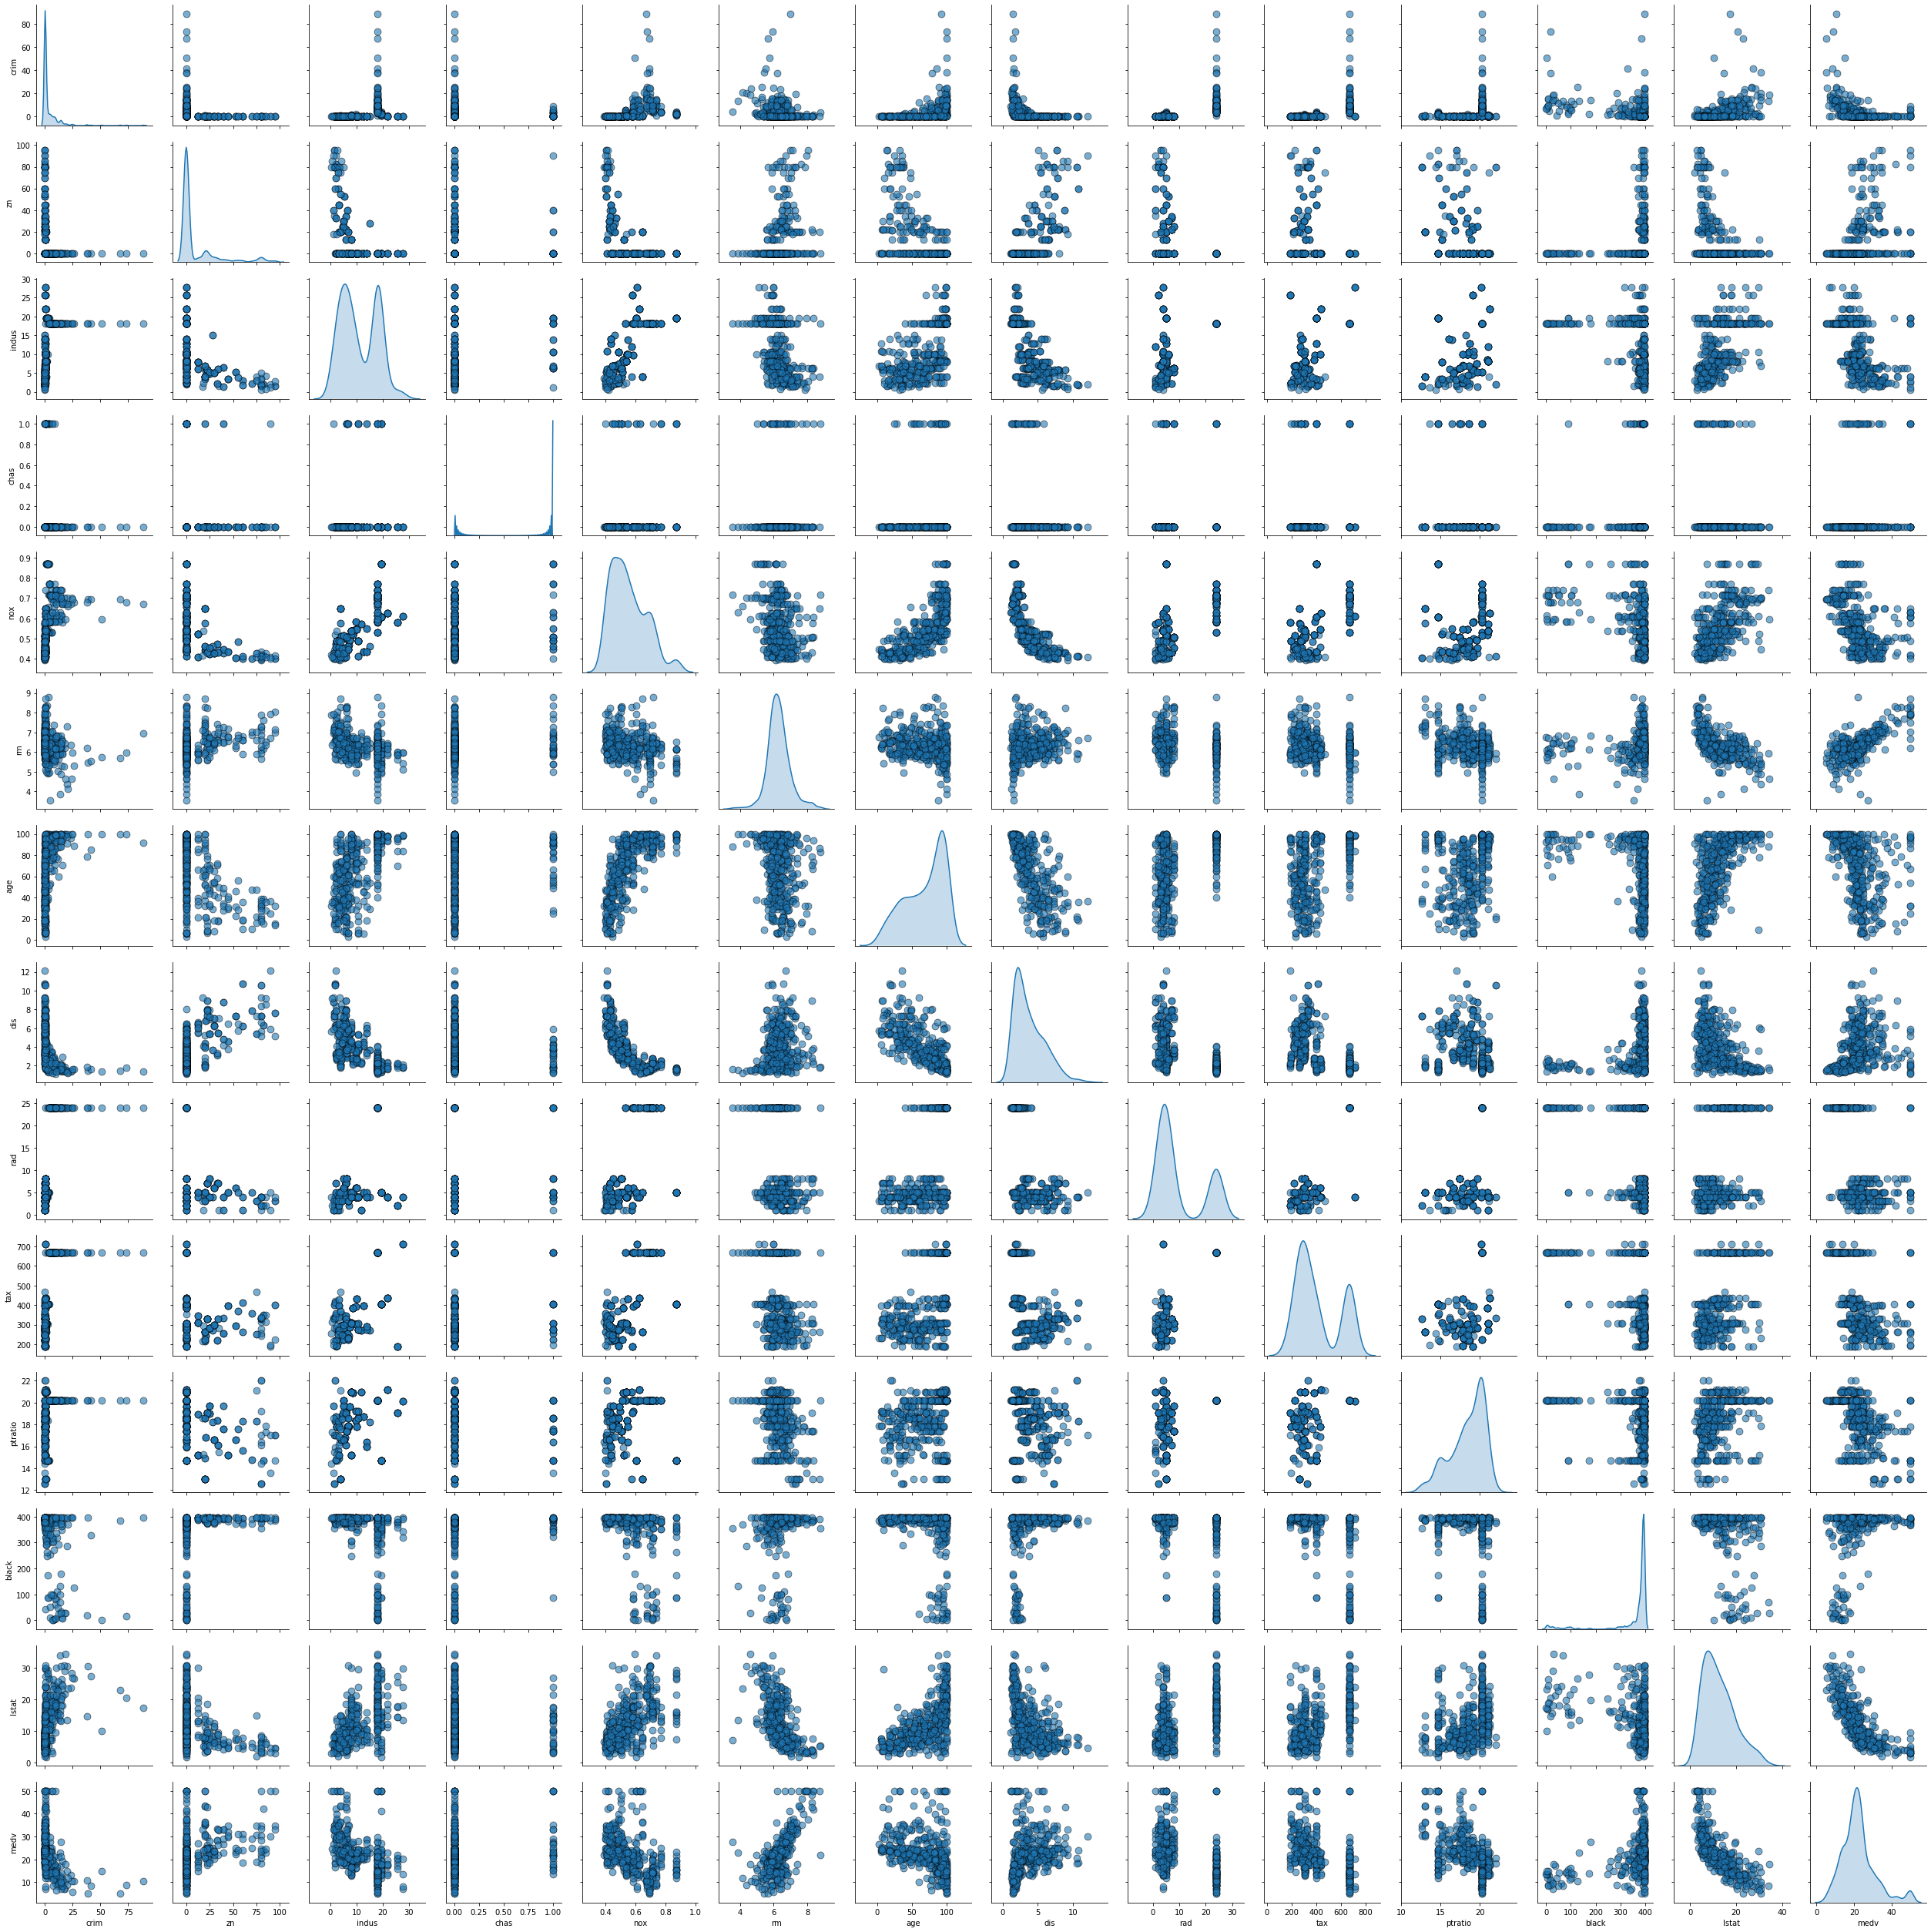

In [9]:
# Your plots here
import seaborn as sns
sns.pairplot(boston, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

# Items to be most correlated, seem to be nox, rm, dis and lstat.

#### NOX

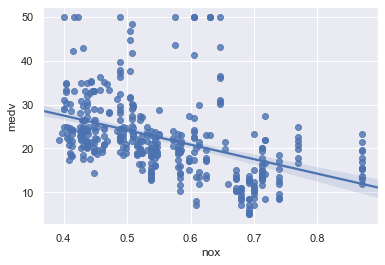

In [10]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="nox", y="medv", data=boston)

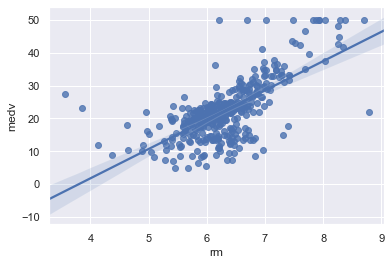

In [11]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="rm", y="medv", data=boston)

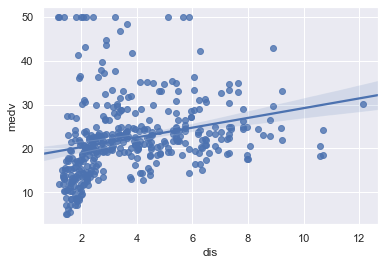

In [12]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="dis", y="medv", data=boston)

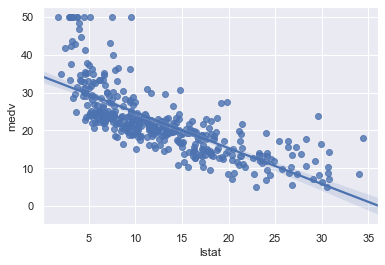

In [13]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="lstat", y="medv", data=boston)

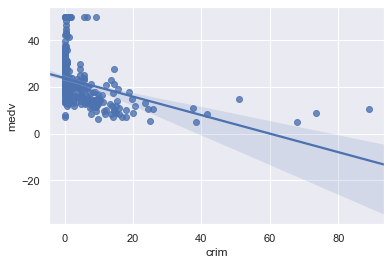

In [14]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="crim", y="medv", data=boston)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# I would have expected crime to have a higher correlation with the price.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

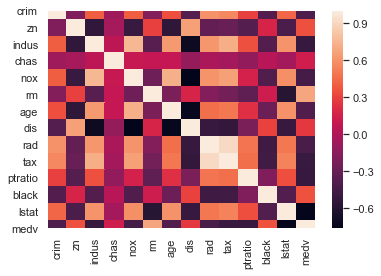

In [30]:
# Your response here

sns.heatmap(boston.corr())
# I did not consider tax and rad.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [15]:
# Your code here
boston["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    
    return r2_score(y_true, y_pred)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [15]:
# Your code here

from sklearn.model_selection import train_test_split

y = boston['medv']
X = boston.drop(['medv'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 29, shuffle= True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [26]:
# Five separate RFR here with the given max depths

# You should always:
# - initialize the model
# - fit
# - predict

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

def regress_score (max_d):
    regr = RandomForestRegressor(max_depth=max_d)
    regr.fit(X_train, y_train)
    acc_score = regr.score(X_test, y_test)
    return acc_score

In [30]:
max_dpth = [2,4,6,8,10]
accuracy_score = [regress_score(x) for x in max_dpth]
accuracy_score

/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

[0.7428141547962963,
 0.8119381077012632,
 0.8141731668459401,
 0.8196761549684365,
 0.7905148321176004]

Now, plot the score for each tree on the training set and on the testing set.

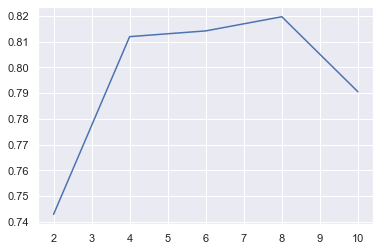

In [31]:
# Produce a plot with the score for the testing and training for the different max depths
x = max_dpth
y = accuracy_score

plt.plot(x,y)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

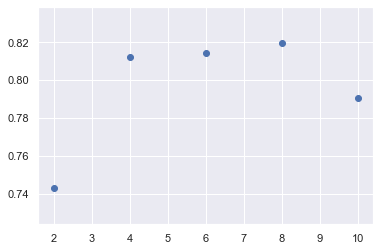

In [32]:
plt.scatter(x,y)
plt.show

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [35]:
# Your response here
"""
The results are showing that the higher the depth of the trees, it gives a better performance.
However, after a depth of 8, the performance of the model goes down.
"""

'\nThe results are showing that the higher the depth of the trees, it gives a better performance.\nHowever, after a depth of 8, the performance of the model goes down.\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [37]:
# Your response here
regr = RandomForestRegressor(max_depth= 1)
regr.fit(X_train, y_train)
acc_score = regr.score(X_test, y_test)

print(acc_score)

0.5473704519178553


/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
regr = RandomForestRegressor(max_depth= 10)
regr.fit(X_train, y_train)
acc_score = regr.score(X_test, y_test)

print(acc_score)

0.778038741058086


/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# The bias would be the average difference between each model's predictions and the true values.
# For max_depth = 1 the bias seems bigger than for max_depth = 10

# Variance is the measure of how different the predictions for a given point are from the true value.
# We cannot say much about the variance, but since the accuracy score for dept= 10 is higher than for depth= 1, 
# I would say that the variance is lower.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [39]:
# Your response here
regr = RandomForestRegressor(max_depth= 9)
regr.fit(X_train, y_train)
acc_score = regr.score(X_test, y_test)

print(acc_score)

# A max_depth of 9 could optimize the model.
# When running this, it seems to optimize indeed the model.

0.8283733024663757


/Users/juliette/opt/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''
1. How relevant today is data that was collected from 1978?
Prices have probably increased since 1978, so the data is not very representative (or that can be expected)

2. Are the features present in the data sufficient to describe a home?
There are many features to describe a home that are not present in the dataset, like number of rooms/bathrooms etc.

3. Is the model robust enough to make consistent predictions?
The accuracy with max depth = 9 is good and not too high, which means it is probably not overfitting.
This makes the model robust enough.

4. Would data collected in an urban city like Boston be applicable in a rural city?
In general prices in rural areas are different from prices in urban areas. Therefore the data is likely not to be applicable
in a rural city.


'''